### Car price prediction

In [22]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Additional libraries
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [3]:
# Reading the data
df_init = pd.read_csv('car data.csv')

In [4]:
# High level analaysis of data
df_init.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df_init.shape

(301, 10)

In [6]:
df_init.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [8]:
columns = df_init.columns

#checking unique values in the category type columns(object)
for column in columns:
    if df_init[column].dtypes == 'object':
        print('*'*40)
        print(df_init[column].unique())
    

****************************************
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '

In [9]:
df_init['Owner'].dtypes

dtype('int64')

In [10]:
# Checking some of the other columns
df_init['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [11]:
# Cheking for null values
df_init.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# Adding a new column to find the Age of car
df_init['Age'] = df_init['Year'].apply(lambda x: 2021 - x).astype('int64')

In [13]:
df_init.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [14]:
# dropping the column Year as it is redundant now
df_init = df_init.drop(['Year'], axis = 1)
df_init.head()

,Car_Name,company,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,maruti suzuki,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,maruti suzuki,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,maruti suzuki,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,maruti suzuki,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,maruti suzuki,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
# dropping the column Car_Name as it is not adding any value
df_init = df_init.drop(['Car_Name'], axis = 1)
df_init.head()

,company,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,maruti suzuki,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,maruti suzuki,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,maruti suzuki,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,maruti suzuki,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,maruti suzuki,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
# Converting categorical ariables into dummy variable
df_final = pd.get_dummies(df_init, drop_first = True)

In [17]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,company_hero,company_honda,company_hyndai,company_maruti suzuki,company_other,company_toyota,company_tvs,company_yamaha,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,0,1,0,0,0,0,0,1,0,1
1,4.75,9.54,43000,0,8,0,0,0,1,0,0,0,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,0,1,0,0,0,0,0,1,0,1
3,2.85,4.15,5200,0,10,0,0,0,1,0,0,0,0,0,1,0,1
4,4.60,6.87,42450,0,7,0,0,0,1,0,0,0,0,1,0,0,1


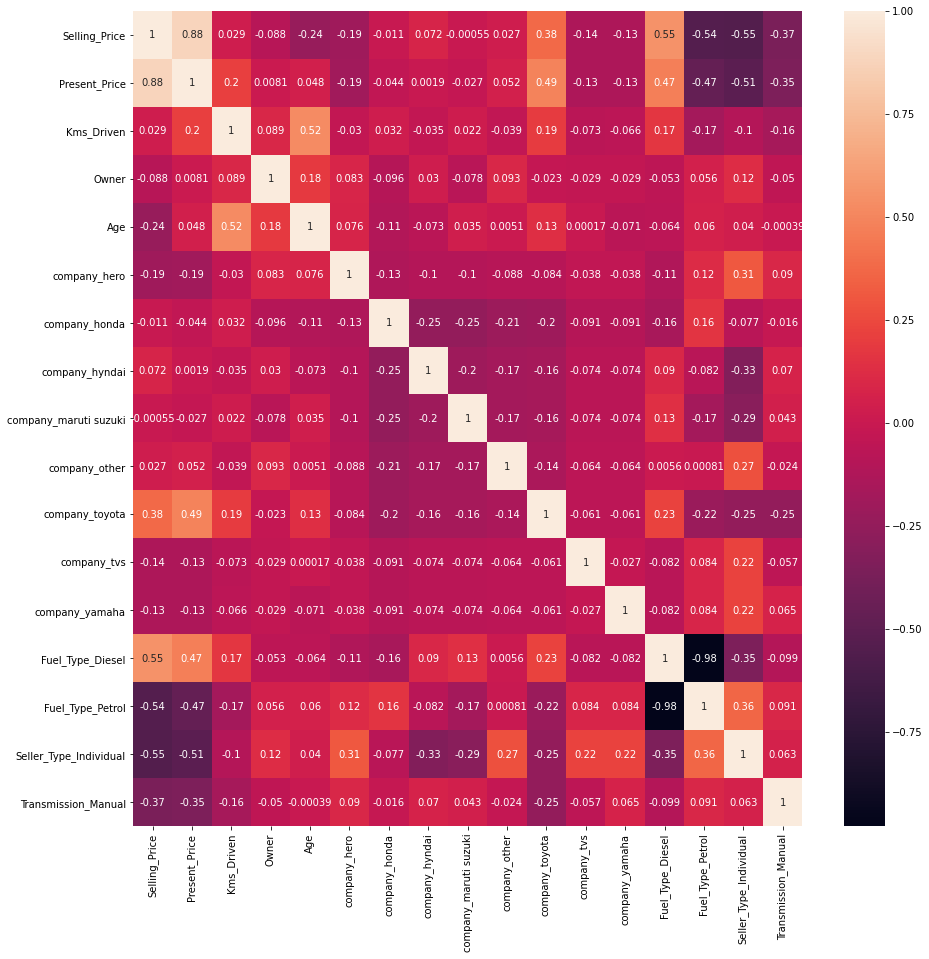

In [31]:
# Visualizing the correlation between the variables

corr = df_final.corr()


plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True)
plt.show()


In [38]:
# Preparing the dataset for test train split
X, y = df_final.iloc[:, 1:], df_final.iloc[:, 0]

In [39]:
# Checking for feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[3.38151525e-01 3.89987406e-02 5.94784365e-04 7.24007174e-02
 4.01880625e-06 4.00585798e-03 2.91315523e-03 3.62026928e-03
 7.89949058e-03 7.54844225e-03 4.88514290e-06 4.58307187e-06
 2.36643872e-01 9.33466695e-03 1.34342049e-01 1.43532943e-01]


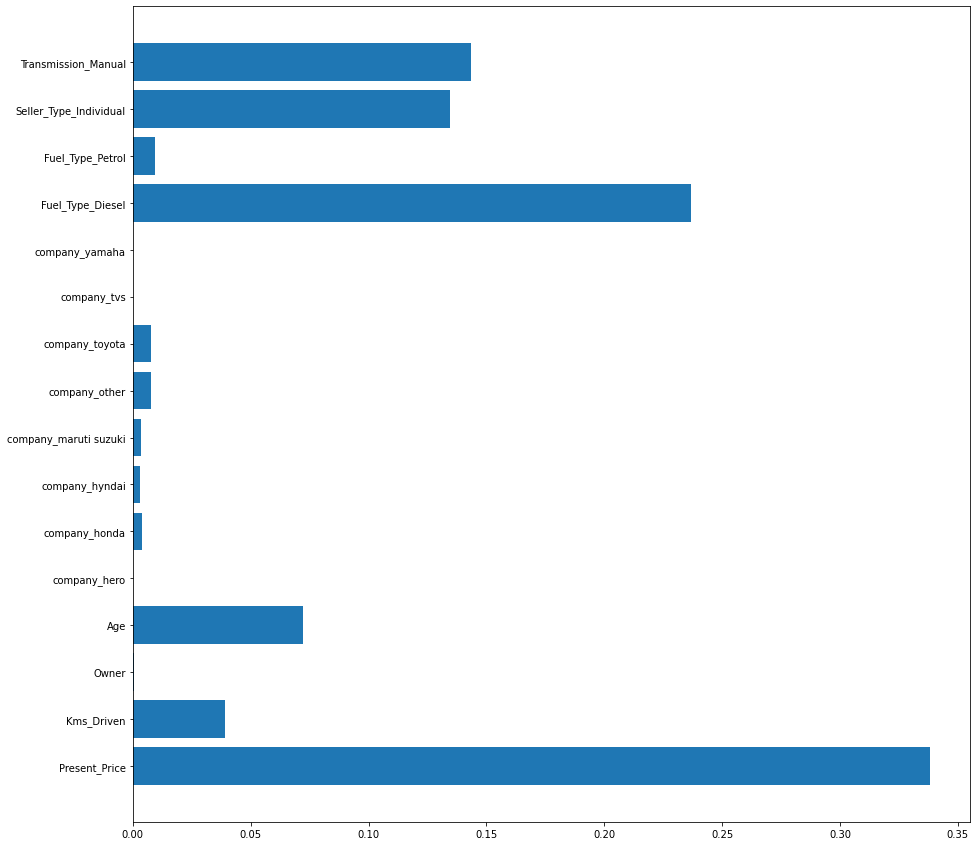

In [48]:
# Plotting the graph for feature importance
imp_features = pd.Series(data = model.feature_importances_, index = X.columns)
plt.figure(figsize=(15, 15))
plt.barh(imp_features.index, imp_features)
plt.show()

In [52]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [56]:
# Building a Random Forest model
from sklearn.ensemble import RandomForestRegressor

base_rf = RandomForestRegressor()


In [54]:
# Setting up the hyperparameters

# Number of trees in Random Forest
n_estimators = [100, 200, 400, 500, 800]
# Maximum number of levels in the tree
max_depth = [5, 10, 15, 20, 25, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [55]:
# We will tune the hyperparameters using RandomGridSearch
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100, 200, 400, 500, 800],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 20, 50, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [57]:
rf_random = RandomizedSearchCV(estimator = base_rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_dep

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50,
                                                              100],
                                        'n_estimators': [100, 200, 400, 500,
                                                         800]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
# Checking the best params
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [59]:
rf_random.best_score_

-3.5175701773196466

In [60]:
predictions = rf_random.predict(X_test)

c:\users\parth\anaconda3\envs\carsalepred\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


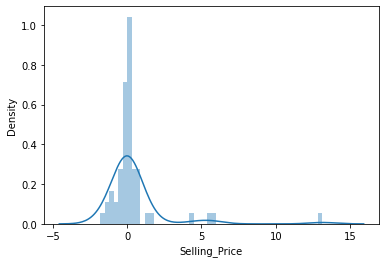

In [61]:
sns.distplot(predictions - y_test)
plt.show()

In [62]:
# Getting an idea about the performance metrics of the model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.85904205893833
MSE: 4.534830412289833
RMSE: 2.129514125872339


In [63]:
# Saving the model as a pickle file
import pickle

file = open('Car_Price_Pred_RF_model.pkl', 'wb')

# Dump information to that file
pickle.dump(rf_random, file)